### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [5]:
#Sumando el precio total x cada tienda

suma_tienda_4 = tienda4['Precio'].sum()
suma_tienda_3 = tienda3['Precio'].sum()
suma_tienda_2 = tienda2['Precio'].sum()
suma_tienda_1 = tienda1['Precio'].sum()

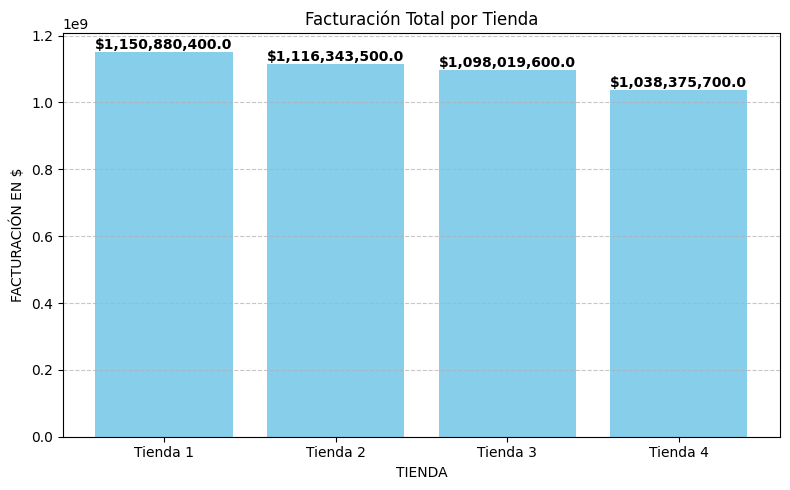

In [6]:
import matplotlib.pyplot as plt

# Crear el DataFrame resumen
facturacion = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [suma_tienda_1, suma_tienda_2, suma_tienda_3, suma_tienda_4]
})

# Crear gráfico de barras
plt.figure(figsize=(8,5))
barras = plt.bar(facturacion['Tienda'], facturacion['Facturación'], color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xlabel('TIENDA')
plt.ylabel('FACTURACIÓN EN $')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar los valores sobre las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura, f'${altura:,.1f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [7]:
import pandas as pd

# URLs de los CSV de cada tienda
urls = {
    "Tienda 1": url,
    "Tienda 2": url2,
    "Tienda 3": url3,
    "Tienda 4": url4
}

# Diccionarios donde guardaremos los DataFrames resumen
resumen_categorias = {}

for nombre, ruta in urls.items():
    # Cargar datos
    df = pd.read_csv(ruta)

    # Agrupar por categoría:
    agg = (
        df
        .groupby('Categoría del Producto')                      # agrupamos por categoría
        .agg(
            Cantidad_Vendida = ('Categoría del Producto', 'size'),          # contamos filas
            Total_Facturado = ('Precio', 'sum')                # sumamos la columna de valor
        )
        .reset_index()                                         # devolvemos índice a columna
        .sort_values('Cantidad_Vendida', ascending=False)      # ordenamos de mayor a menor
    )

    resumen_categorias[nombre] = agg
    print(f"\n=== {nombre} ===")
    print(agg.head(10))  # muestras las 10 categorías top

"""# Si quieres un resumen global:
global_resumen = (
    pd.concat(resumen_categorias, names=['Tienda', 'Categoría'])
      .reset_index(level=0)
      .groupby('Categoría del Producto')
      .agg(
        Tiendas_que_venden = ('Tienda', 'nunique'),
        Total_Cantidad = ('Cantidad_Vendida', 'sum'),
        Total_Facturado = ('Total_Facturado', 'sum')
      )
      .sort_values('Total_Cantidad', ascending=False)
)
print("\n=== Resumen Global de Categorías ===")
print(global_resumen.head(10))"""


=== Tienda 1 ===
    Categoría del Producto  Cantidad_Vendida  Total_Facturado
7                  Muebles               465      187633700.0
3             Electrónicos               448      429493500.0
5                 Juguetes               324       17995700.0
2        Electrodomésticos               312      363685200.0
1     Deportes y diversión               284       39290000.0
4   Instrumentos musicales               182       91299000.0
6                   Libros               173        8784900.0
0  Artículos para el hogar               171       12698400.0

=== Tienda 2 ===
    Categoría del Producto  Cantidad_Vendida  Total_Facturado
7                  Muebles               442      176426300.0
3             Electrónicos               422      410831100.0
5                 Juguetes               313       15945400.0
2        Electrodomésticos               305      348567800.0
1     Deportes y diversión               275       34744500.0
4   Instrumentos musicales        

'# Si quieres un resumen global:\nglobal_resumen = (\n    pd.concat(resumen_categorias, names=[\'Tienda\', \'Categoría\'])\n      .reset_index(level=0)\n      .groupby(\'Categoría del Producto\')\n      .agg(\n        Tiendas_que_venden = (\'Tienda\', \'nunique\'),\n        Total_Cantidad = (\'Cantidad_Vendida\', \'sum\'),\n        Total_Facturado = (\'Total_Facturado\', \'sum\')\n      )\n      .sort_values(\'Total_Cantidad\', ascending=False)\n)\nprint("\n=== Resumen Global de Categorías ===")\nprint(global_resumen.head(10))'

# 3. Calificación promedio de la tienda


In [ ]:
tienda1.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [8]:
clasificacion_tienda_1 = tienda1['Calificación'].mean()
clasificacion_tienda_2 = tienda2['Calificación'].mean()
clasificacion_tienda_3 = tienda3['Calificación'].mean()
clasificacion_tienda_4 = tienda4['Calificación'].mean()

print(clasificacion_tienda_1)
print(clasificacion_tienda_2)
print(clasificacion_tienda_3)
print(clasificacion_tienda_4)

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


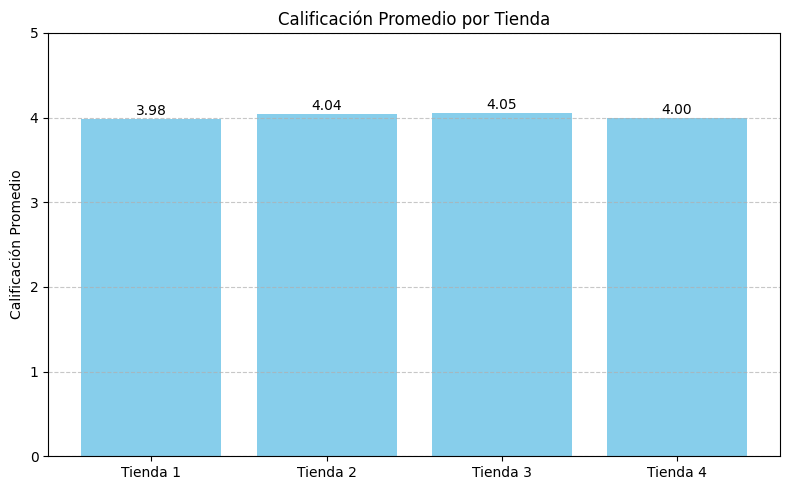

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular promedio de clasificación por tienda
calificación = {
    "Tienda 1": tienda1['Calificación'].mean(),
    "Tienda 2": tienda2['Calificación'].mean(),
    "Tienda 3": tienda3['Calificación'].mean(),
    "Tienda 4": tienda4['Calificación'].mean()
}

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(calificación.keys(), calificación.values(), color='skyblue')
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)

# Añadir valores sobre cada barra
for tienda, valor in calificación.items():
    plt.text(tienda, valor + 0.05, f"{valor:.2f}", ha='center')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Productos más y menos vendidos

<ipython-input-12-71eed9191e2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, ax=axes[0], palette='Greens_d')
<ipython-input-12-71eed9191e2d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, ax=axes[1], palette='Reds_d')


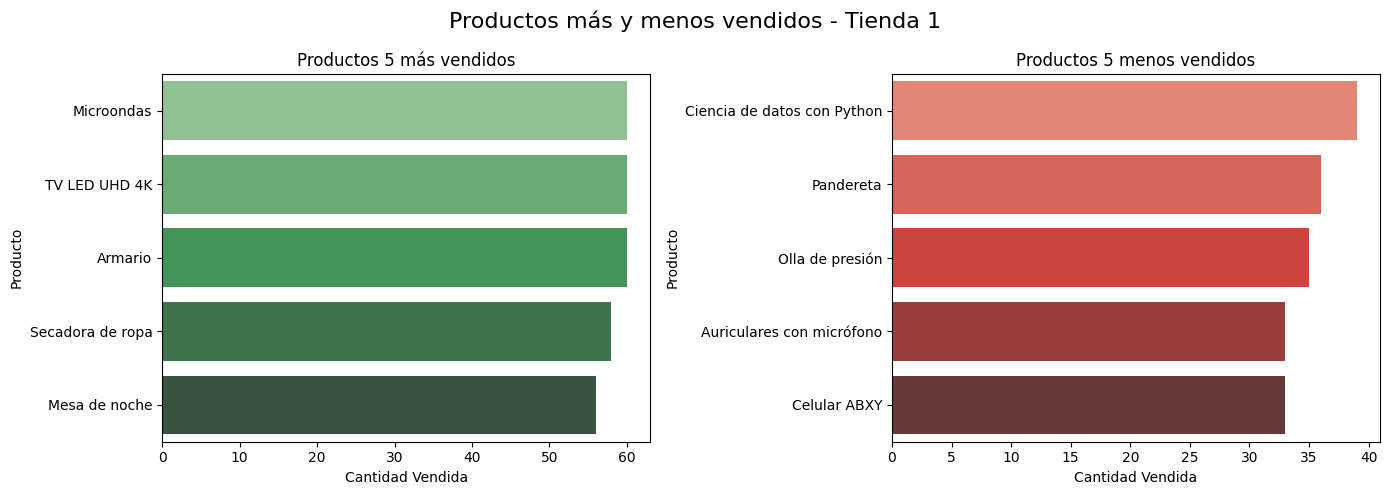

<ipython-input-12-71eed9191e2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, ax=axes[0], palette='Greens_d')
<ipython-input-12-71eed9191e2d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, ax=axes[1], palette='Reds_d')


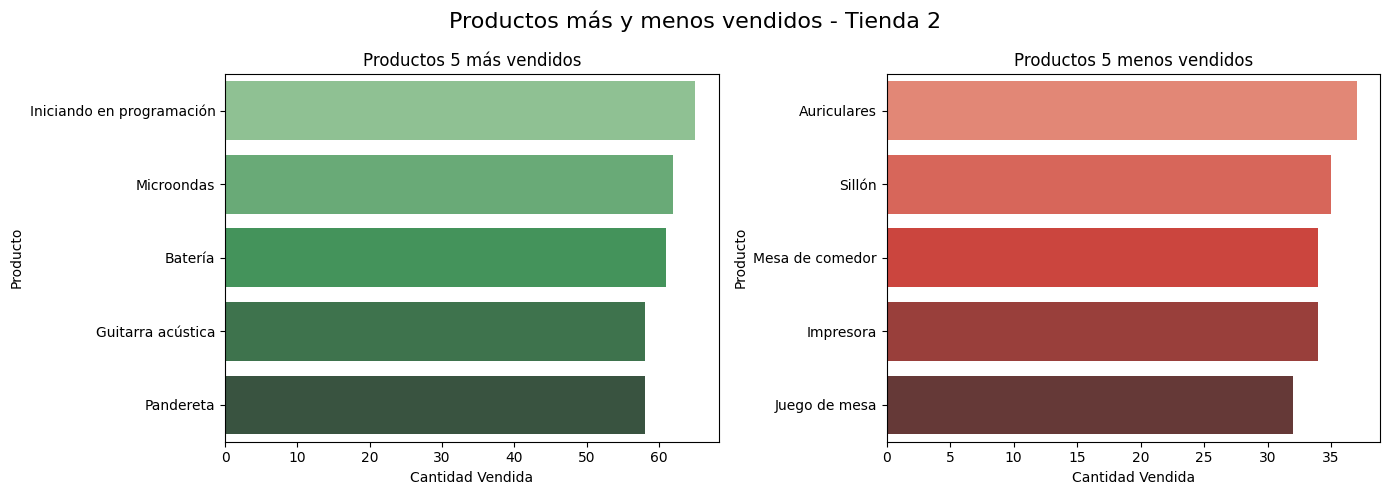

<ipython-input-12-71eed9191e2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, ax=axes[0], palette='Greens_d')
<ipython-input-12-71eed9191e2d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, ax=axes[1], palette='Reds_d')


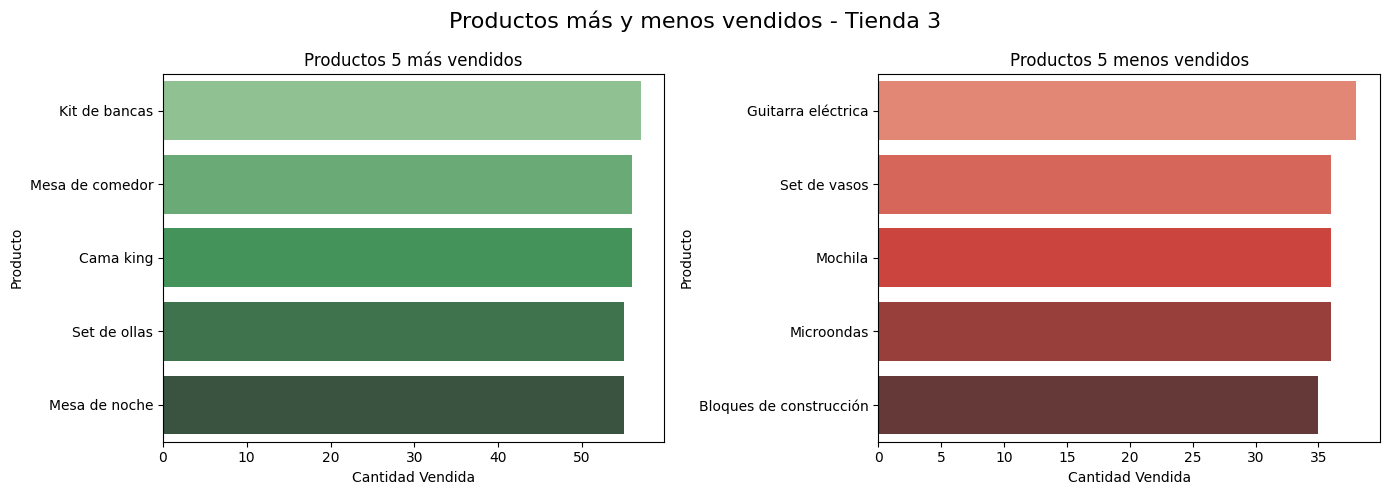

<ipython-input-12-71eed9191e2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.values, y=top_5.index, ax=axes[0], palette='Greens_d')
<ipython-input-12-71eed9191e2d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.values, y=bottom_5.index, ax=axes[1], palette='Reds_d')


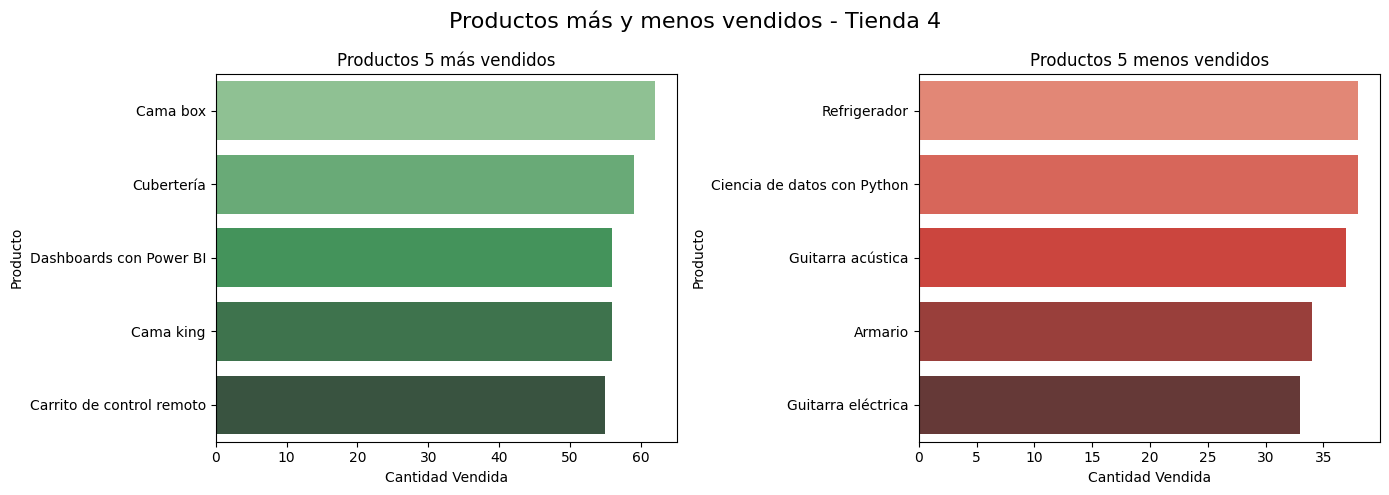

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def productos_mas_menos_vendidos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()

    top_5 = conteo.head(5)
    bottom_5 = conteo.tail(5)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Productos más y menos vendidos - {nombre_tienda}', fontsize=16)

    sns.barplot(x=top_5.values, y=top_5.index, ax=axes[0], palette='Greens_d')
    axes[0].set_title('Productos 5 más vendidos')
    axes[0].set_xlabel('Cantidad Vendida')
    axes[0].set_ylabel('Producto')

    sns.barplot(x=bottom_5.values, y=bottom_5.index, ax=axes[1], palette='Reds_d')
    axes[1].set_title('Productos 5 menos vendidos')
    axes[1].set_xlabel('Cantidad Vendida')
    axes[1].set_ylabel('Producto')

    plt.tight_layout()
    plt.show()

# Ejecutamos para cada tienda
productos_mas_menos_vendidos(tienda1, "Tienda 1")
productos_mas_menos_vendidos(tienda2, "Tienda 2")
productos_mas_menos_vendidos(tienda3, "Tienda 3")
productos_mas_menos_vendidos(tienda4, "Tienda 4")

# 5. Envío promedio por tienda

In [13]:
tienda1.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

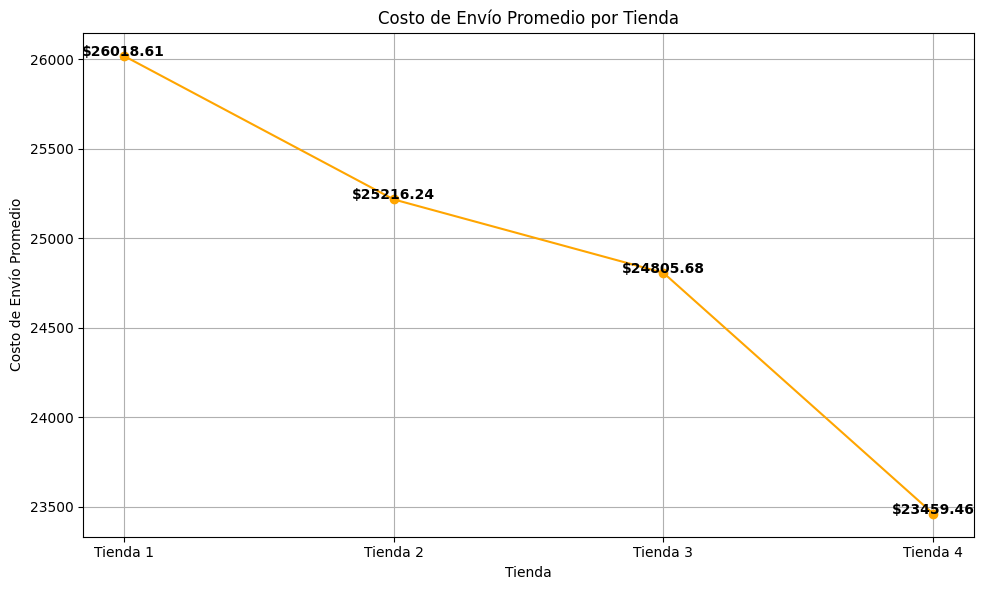

In [15]:
import matplotlib.pyplot as plt

# Cálculo del costo de envío promedio por tienda
envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(list(envio_promedio.keys()), list(envio_promedio.values()), marker='o', linestyle='-', color='orange')
for i, v in enumerate(envio_promedio.values()):
    plt.text(i, v + 0.2, f'${v:.2f}', ha='center', fontweight='bold')

plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

#Informe Final de Análisis de Tiendas – Recomendación de Inversión para el Sr. Juan



##Introducción

El objetivo de este análisis es proporcionar al Sr. Juan información clara y objetiva sobre el desempeño de sus cuatro tiendas actuales. Esta evaluación le permitirá tomar una decisión fundamentada respecto a cuál tienda replicar o expandir con una nueva inversión. Para ello, se analizaron diversos factores clave: ingresos totales, categorías de productos más vendidas, reseñas de clientes, productos destacados en ventas y el costo de envío promedio. Cada uno de estos elementos fue visualizado y comparado para identificar la tienda con el mejor rendimiento general.

##Desarrollo

###1. Ingresos Totales por Tienda


Se calcularon los ingresos sumando el valor total de los productos vendidos. El análisis muestra:


*   Tienda 3 lidera en facturación con una diferencia considerable frente a las demás.
*   Tienda 2 presenta el ingreso más bajo.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

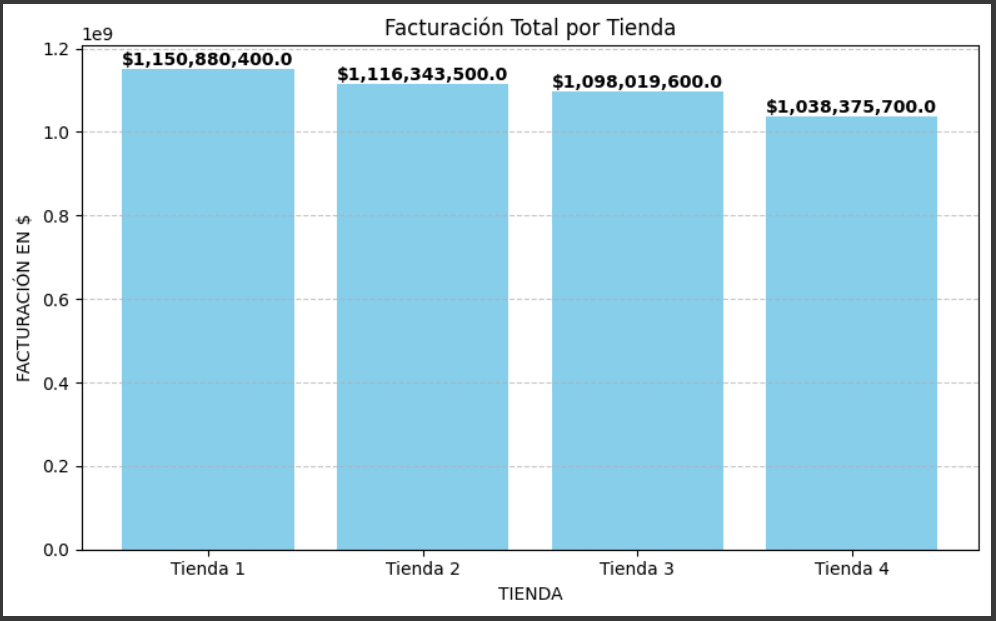

In [17]:
from IPython.display import Image
Image("/content/drive/MyDrive/IMAGEN_PYTHON/FACTURACIÓN_TOTAL_x_TIENDA.png")

###2. Categorías Más y Menos Vendidas

El conteo de productos vendidos por categoría permitió identificar las preferencias de los clientes:


*   Tienda 3 y 4 tienen un portafolio más diversificado con categorías consistentes en ventas.
*   En tiendas 1 y 2, ciertas categorías dominan pero con menor volumen general.
*   Las categorías más vendidas tienden a coincidir con las de mayor facturación.



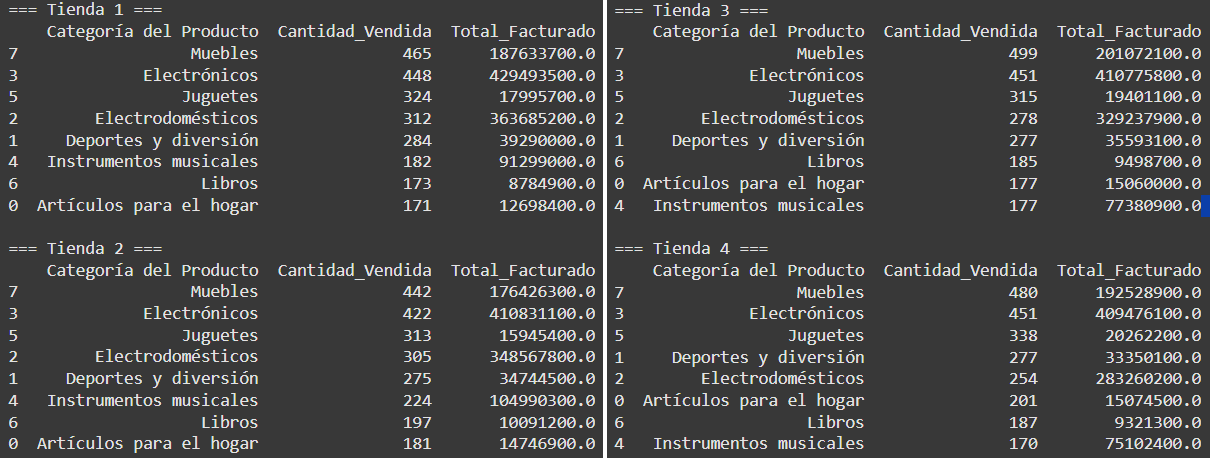

In [18]:
from IPython.display import Image
Image("/content/drive/MyDrive/IMAGEN_PYTHON/VENTAS_POR_CATEGORIA.png")

###3. Calificación Promedio por Tienda

Se promedió la calificación de los clientes para cada tienda:

*   Tienda 1 tiene la mejor calificación promedio.
*   Tienda 4 registra la más baja.

Esto indica una alta satisfacción del cliente en tienda 1, aunque no necesariamente se traduce en mayores ingresos.

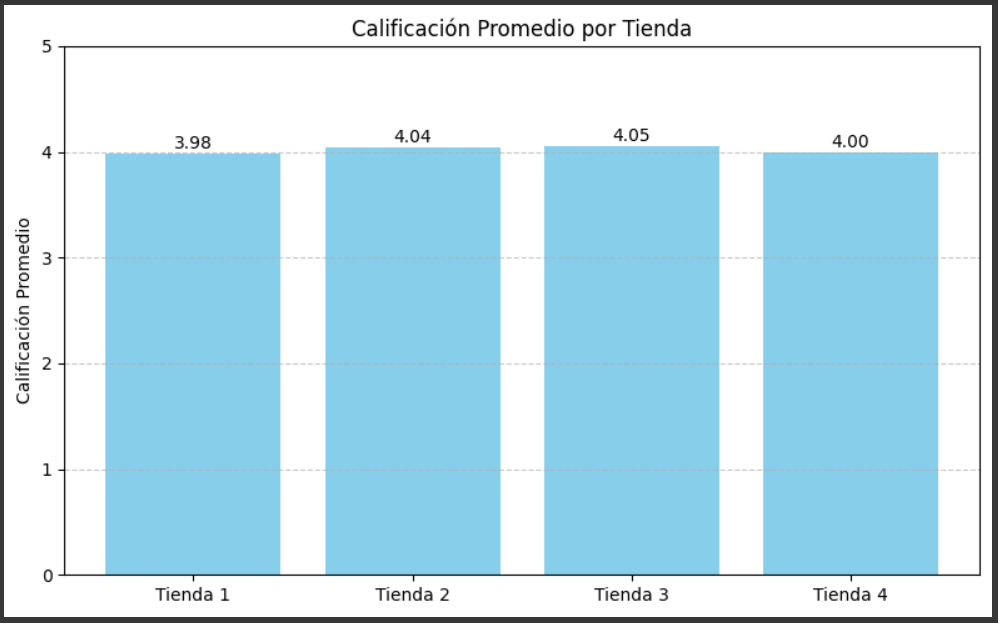

In [19]:
from IPython.display import Image
Image("/content/drive/MyDrive/IMAGEN_PYTHON/CLASIFICACIÓN_PROMEDIO.png")

###4. Productos Más y Menos Vendidos

Se identificaron los productos con mayores y menores ventas:

*   Tienda 3 tiene varios productos con alto volumen de ventas, lo que contribuye a su alto ingreso.

*   Las otras tiendas tienen ventas más distribuidas o menores picos de venta por producto.


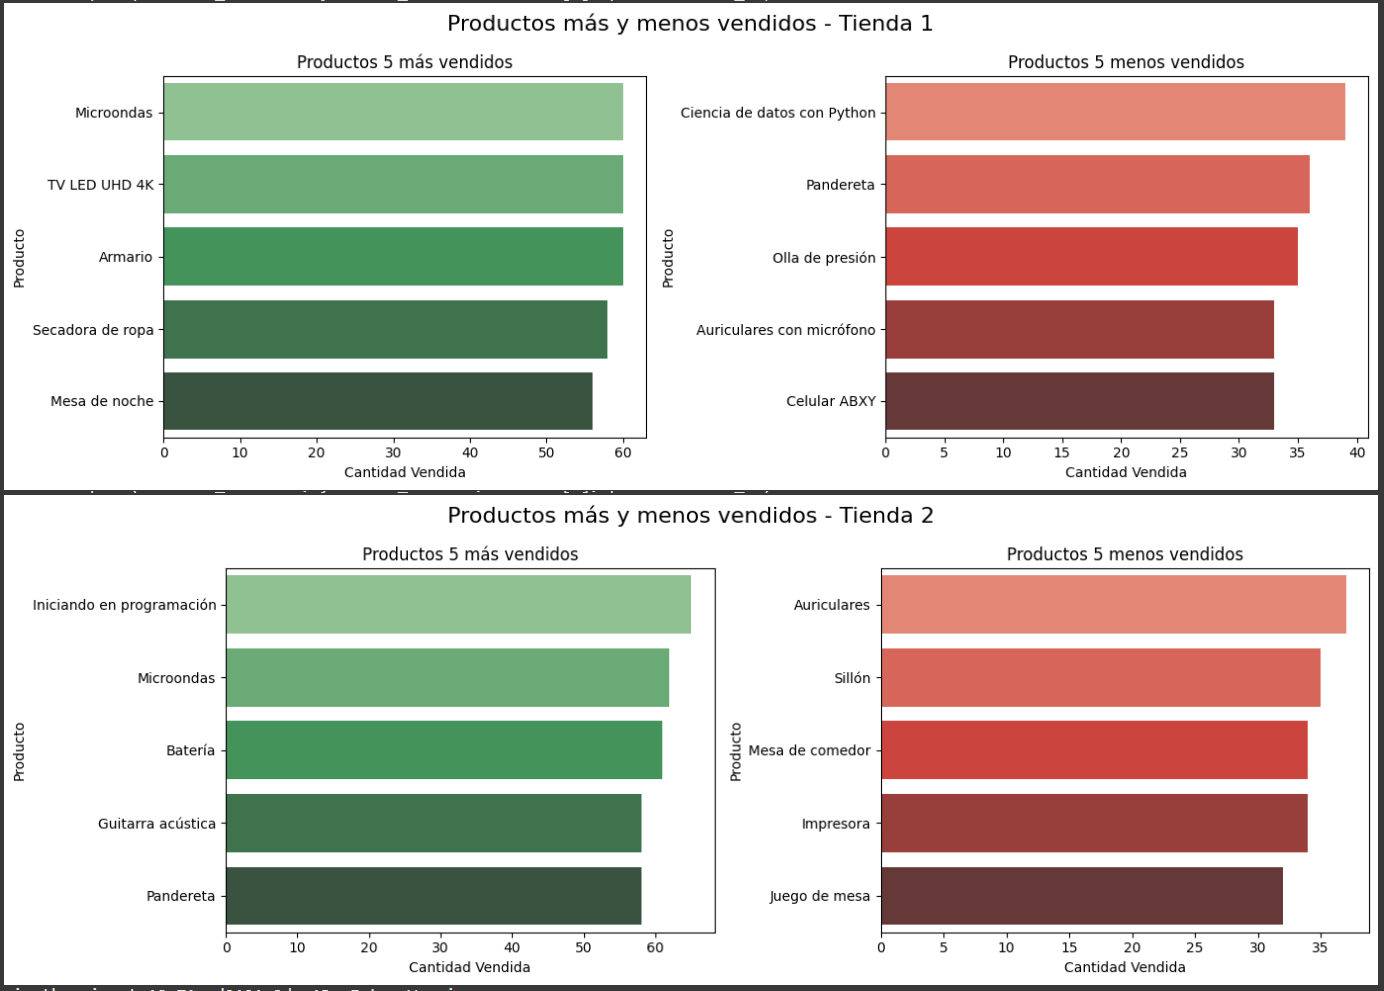

In [21]:
from IPython.display import Image
Image("/content/drive/MyDrive/IMAGEN_PYTHON/PRODUCTOS +Y- VENDIDOS_1.png")

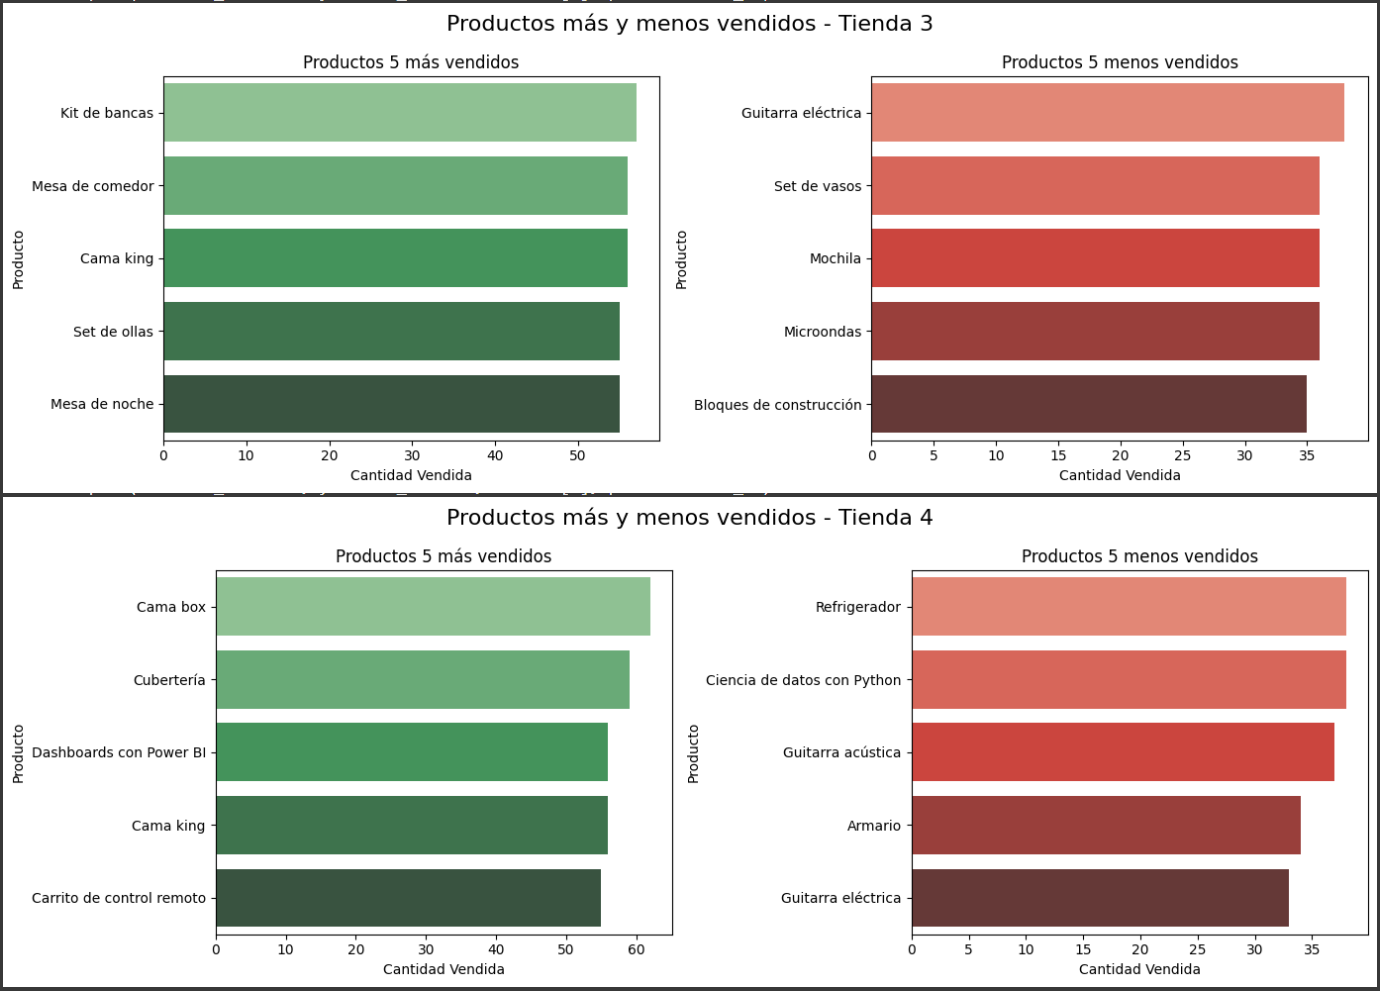

In [22]:
Image("/content/drive/MyDrive/IMAGEN_PYTHON/PRODUCTOS +Y- VENDIDOS_2.png")

###5. Costo de Envío Promedio

El costo de envío afecta los márgenes de ganancia. Se observó que:

*   Tienda 2 tiene el costo de envío promedio más bajo.
*   Tienda 4 presenta el costo más alto.

Aunque tienda 2 es eficiente en logística, su baja facturación no compensa este punto fuerte.

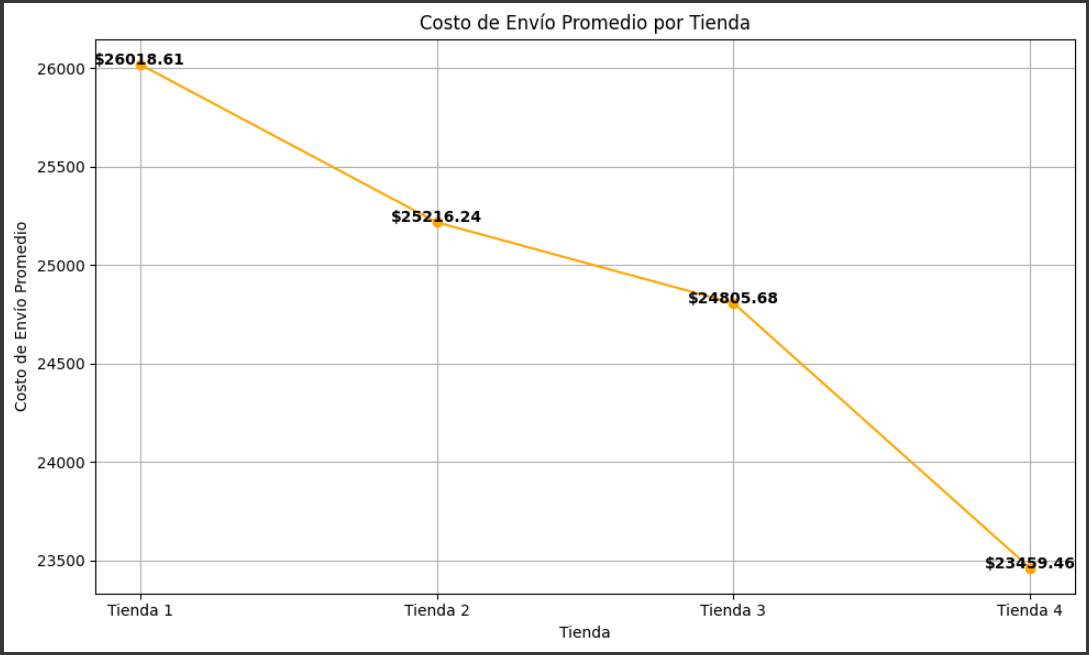

In [23]:
from IPython.display import Image
Image("/content/drive/MyDrive/IMAGEN_PYTHON/COSTO_PROMEDIO_ENVIO.png")

##Conclusión y Recomendación

Luego de evaluar todos los factores, se recomienda que el Sr. Juan invierta en replicar el modelo de negocio de la Tienda 3. Esta tienda destaca por:

*   Mayor ingreso total, lo que demuestra fuerte demanda.
*   Buen desempeño en varias categorías, lo que reduce dependencia de un solo tipo de producto.
*   Productos altamente vendidos, lo que facilita decisiones de inventario.
*   Costo de envío competitivo, no siendo el más bajo, pero razonable considerando el volumen de ventas.

Aunque la Tienda 1 tiene la mejor calificación, sus ingresos son menores. La Tienda 2, aunque eficiente en logística, presenta bajo volumen de ventas. La Tienda 4 es sólida en ventas, pero su alto costo de envío y menor satisfacción del cliente representan puntos críticos.

Por lo tanto, Tienda 3 representa el equilibrio ideal entre ingresos, diversidad de productos y eficiencia operacional, siendo la más adecuada para una futura expansión.


La Tienda 2, si bien tiene el costo de envío más bajo, muestra:

*   El nivel más bajo de facturación.
*   Menor diversidad en categorías vendidas.
*   Productos poco destacados en ventas.
*   Calificaciones promedio regulares.

Por lo tanto, se recomienda considerar el cierre de la Tienda 2, ya que no muestra señales claras de crecimiento ni fortalezas destacables frente a las demás. Esta acción permitiría reasignar recursos hacia una tienda con mejor rendimiento o para apoyar la nueva inversión basada en el modelo exitoso de la Tienda 3.

Finalmente, aunque la Tienda 4 tiene buen volumen de ventas, debe revisarse su estrategia logística para reducir el elevado costo de envío y mejorar la experiencia del cliente, reflejada en su calificación más baja.